# LAB 4. BIẾN NGẪU NHIÊN LIÊN TỤC (tiếp)
### Xác suất cho Khoa học dữ liệu. Ngày 13/04/2022.

## 1. PHÂN BỐ CHUẨN (GAUSS).

Đại lượng ngẫu nhiên $Z$ có phân bố chuẩn tắc (standard normal distribution) nếu hàm mật độ xác suất của nó là $$f(x) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{x^2}{2}}.$$
Đồ thị của nó có dạng hình chuông, đối xứng qua trục tung và đạt cực đại tại $x=0$ như bên dưới
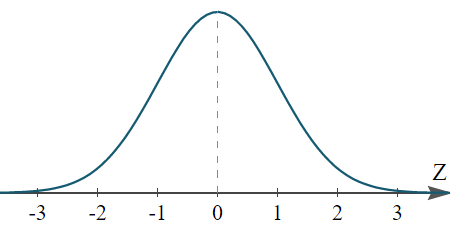
Ta chứng minh được kỳ vọng, mod và median của $Z$ đều là $0$, còn phương sai là $1$. Đây là một phân bố đẹp, mang tính tổng quát cho nhiều tình huống trong thực tế. Nó còn giúp ta xấp xỉ được nhiều phân phối khác. <br>
Bên cạnh đó, nếu ký hiệu $\Phi (x)$ là hàm phân bố xác suất của $f(x)$, cũng chính là nguyên hàm của $\Phi(x)$ thì hàm này có tính chất là $$\Phi (-x) = 1 - \Phi (x).$$
Tuy nhiên, ta không biểu diễn được biểu thức tường minh của hàm này mà thông thường, ta phải tra bảng công thức. 

Phân bố chuẩn (normal distribution): đại lượng ngẫu nhiên $X$ có phân bố chuẩn với tham số kỳ vọng, phương sai lần lượt là $\mu$ và $\sigma^2 > 0$ nếu đại lượng tương ứng $Z = \frac{X - \mu}{\sigma}$ là một phân bố chuẩn tắc. Ký hiệu là $X \sim N(\mu, \sigma^2).$ 

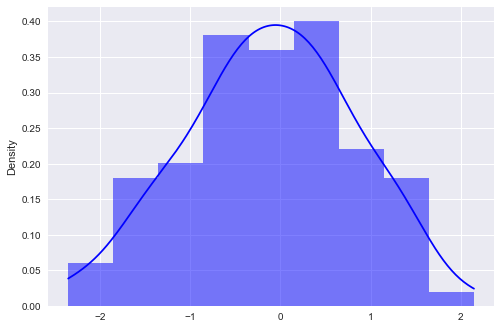

In [2]:
#Dưới đây là code để trực quan một dữ liệu sinh ngẫu nhiên theo phân phối chuẩn tắc
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
a = random.normal(size=100)
sns.histplot(a, color="blue", kde=True, stat="density", linewidth=0);


In [3]:
#Để tính toán xác suất liên quan đến phân phối chuẩn, ta dùng thư viện scipy như sau
import scipy.stats as st
print("Given x, find y = P(X <= x)")
print(st.norm.cdf(1.64))
print("Given y, find x such that P(X <= x) = y")
print(st.norm.ppf(.95))
print("Given x, find y = P(X > x)")
print(st.norm.sf(1.64))
print("Given y, find x such that P(X > x) = y")
print(st.norm.isf(.95))
print("Given x, find y = P(X = x)")
print(st.norm.pdf(0.45))

Given x, find y = P(X <= x)
0.9494974165258963
Given y, find x such that P(X <= x) = y
1.6448536269514722
Given x, find y = P(X > x)
0.05050258347410371
Given y, find x such that P(X > x) = y
-1.6448536269514722
Given x, find y = P(X = x)
0.36052696246164795


**Yêu cầu:** (thực hiện trong 1.5 tiết) <br>
*Từ các nội dung trên, hãy thực hiện các yêu cầu sau:* <br>
1. Giả sử $X$ là đại lượng ngẫu nhiên có phân bố chuẩn với kỳ vọng là $\mu = 2100$ và độ lệch chuẩn $\sigma = 200$. <br>
a) Hãy sinh ra dãy dữ liệu của $X$ với kích thước $100.$ <br>
b) Hãy dùng thư viện Seaborn, trực quan dữ liệu trên. <br>
c) Tính $P(X > 2400), P(1700 < X < 2200)$. <br>
d) Xác định $a, b$ sao cho $P(X <= a) = 0.56$ và $P(X > b) = 0.03$. <br>
<br>
2. Trọng lượng một con bò được nuôi trong trang trại là đại lượng ngẫu nhiên có phân bố chuẩn với kỳ vọng $250kg$ và độ lệch chuẩn $40kg$. <br>
a) Hãy sinh ra một bảng dữ liệu của $X$ với kích thước $10 \times 10.$ <br>
b) Hãy dùng thư viện Seaborn, trực quan dữ liệu trên. <br>
c) Tính xác suất để con bò nặng hơn $300kg$, nhẹ hơn $150kg$. <br>
d) Tính xác suất để khối lượng con bò trong khoảng $(250,270)kg.$ <br>
<br>
3. Thời gian từ nhà đi đến trường trong học kỳ vừa rồi của sinh viên Bình là một đại lượng ngẫu nhiên $X$ có phân bố chuẩn. Biết rằng $65\%$ số ngày thì Bình tốn hơn $20$ phút, còn $8 \%$ số ngày thì Bình tốn hơn $30.$ <br>
a) Tìm thời gian trung bình và độ lệch chuẩn của thời gian đi học của Bình. <br>
b) Nếu Bình xuất phát từ nhà vào $6h15$ sáng thì xác suất Bình trễ tiết $1$ của IUH là bao nhiêu? <br>
c) Bình cần xuất phát vào lúc nào để xác suất kịp học tiết $10$ của IUH là $0.98$? <br>

**Bài làm**

1. Giả sử $X$ là đại lượng ngẫu nhiên có phân bố chuẩn với kỳ vọng là $\mu = 2100$ và độ lệch chuẩn $\sigma = 200$. <br>
a) Hãy sinh ra dãy dữ liệu của $X$ với kích thước $100.$ <br>
b) Hãy dùng thư viện Seaborn, trực quan dữ liệu trên. <br>
c) Tính $P(X > 2400), P(1700 < X < 2200)$. <br>
d) Xác định $a, b$ sao cho $P(X <= a) = 0.56$ và $P(X > b) = 0.03$. <br>
<br>

*a)Sinh ra dãy dữ liệu của $X$ với kích thước $100.$* <br>

In [4]:
a = random.normal(loc=2100, scale=200, size= 100)
a[:5]

array([2159.91665798, 2074.38753549, 2419.64713537, 2034.92753151,
       2048.94476376])

*b)Dùng thư viện Seaborn, trực quan dữ liệu trên. <br>*

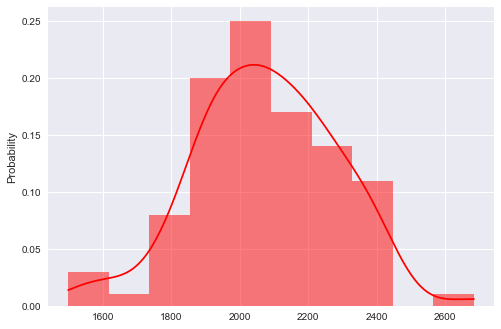

In [5]:
sns.histplot(a, color="red", kde=True, stat="probability", linewidth=0);

*c) Tính $P(X > 2400), P(1700 < X < 2200)$.* <br>

$P(X > 2400) = 1-P(X<=2400)$

In [6]:
P_X1=1-st.norm.cdf(2400,loc=2100,scale=200)
print('Vậy P(X>2400)=',round(P_X1,3))

Vậy P(X>2400)= 0.067


In [7]:
st.norm.sf(2400,loc=2100,scale=200).round(3)

0.067

$P(1700 < X < 2200)= P(X<= 2199) - P(X<= 1700)$

In [8]:
st.norm.cdf(2199,loc=2100,scale=200),st.norm.cdf(1701,loc=2100,scale=200)

(0.6896999397455121, 0.023021439932148342)

In [9]:
P_X2=st.norm.cdf(2199,loc=2100,scale=200)-st.norm.cdf(1700,loc=2100,scale=200)
print('Vậy 𝑃(1700<𝑋<2200)=',round(P_X2,3))

Vậy 𝑃(1700<𝑋<2200)= 0.667


*d) Xác định $a, b$ sao cho $P(X <= a) = 0.56$ và $P(X > b) = 0.03$. <br>*

 $P(X <= a) = 0.56$

In [10]:
a1=st.norm.ppf(0.56,loc=2100,scale=200)
print('Vậy a =',round(a1,3))

Vậy a = 2130.194


$P(X > b) = 0.03$. <br>

In [11]:
b1=st.norm.isf(0.03,loc=2100,scale=200)
print('Vậy b =',round(b1,3))

Vậy b = 2476.159


2. Trọng lượng một con bò được nuôi trong trang trại là đại lượng ngẫu nhiên có phân bố chuẩn với kỳ vọng $250kg$ và độ lệch chuẩn $40kg$. <br>
a) Hãy sinh ra một bảng dữ liệu của $X$ với kích thước $10 \times 10.$ <br>
b) Hãy dùng thư viện Seaborn, trực quan dữ liệu trên. <br>
c) Tính xác suất để con bò nặng hơn $300kg$, nhẹ hơn $150kg$. <br>
d) Tính xác suất để khối lượng con bò trong khoảng $(250,270)kg.$ <br>
<br>

**a) Sinh ra một bảng dữ liệu của $X$ với kích thước $10 \times 10.$** <br>

In [12]:

import pandas as pd
a= np.random.normal(size=(10,10))
df = pd.DataFrame(a)
df


,0,1,2,3,4,5,6,7,8,9
0,1.649846,-1.577385,-0.477951,-0.206605,-0.157683,-2.459259,-1.145570,1.401055,-0.133411,0.965368
1,-0.072844,2.032953,-1.146280,-1.130362,0.376382,0.582758,-0.910225,-1.241966,0.125223,0.940600
2,1.326252,-0.374382,-0.192914,0.053926,-1.175544,2.249520,0.216839,0.009074,-1.071110,1.190208
3,0.652583,0.427390,0.148119,-0.855862,-0.161966,1.596402,-0.662726,-1.579652,0.268631,-0.783570
4,1.696201,0.887199,-0.738236,-1.052694,-0.643352,-0.749366,0.720397,1.625932,-0.746252,-1.115796
5,0.818996,2.714718,-0.263404,-0.230923,-0.512572,0.558275,-0.825501,-0.148634,-1.741401,0.726622
6,0.353486,1.627938,-0.509169,0.539042,-0.614274,1.052075,-0.489481,-0.374820,1.055799,-0.189653
7,0.615360,0.674493,-0.770719,-1.069759,0.429359,1.633560,1.260662,-1.843805,0.993672,0.447044
8,1.681570,-0.058379,-0.741800,0.531451,0.613157,0.960650,-0.226995,0.080451,-1.243011,-0.734429
9,-0.337029,1.053745,0.900388,-0.193197,-2.520574,-0.035064,-0.145476,-0.291507,0.503215,0.845297


**b) Dùng thư viện Seaborn, trực quan dữ liệu trên.**

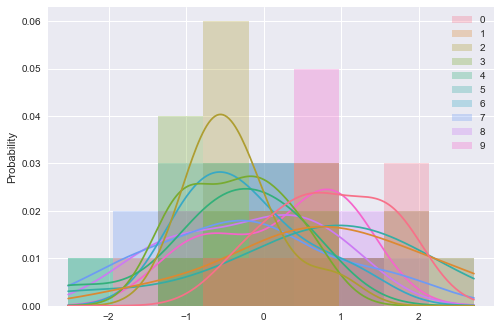

In [13]:
sns.histplot(a, kde=True, stat="probability", linewidth=0,alpha=0.3);

**c) Tính xác suất để con bò nặng hơn $300kg$, nhẹ hơn $150kg$.**<br>

Gọi X là phân phối chuẩn với $Mean = 250$, $Std =40$

In [14]:
X= st.norm(loc=250,scale=40)

* Xác suất để con bò nặng hơn 300kg

In [15]:
ans1 = X.sf(300).round(4)
print('Xác suất để con bò nặng hơn 300kg là :',ans1)

Xác suất để con bò nặng hơn 300kg là : 0.1056


* Xác suất để con bò nhẹ hơn 150kg

In [16]:
ans2 = X.cdf(150).round(4)
print('Xác suất để con bò nhẹ hơn 150kg',ans2)

Xác suất để con bò nhẹ hơn 150kg 0.0062


**d) Xác suất để khối lượng con bò trong khoảng $(250,270)kg.$**

In [17]:
ans = X.cdf(270)-X.cdf(250)
print('Xác suất để khối lượng con bò trong khoảng (250,270)𝑘𝑔 là:',ans.round(4))

Xác suất để khối lượng con bò trong khoảng (250,270)𝑘𝑔 là: 0.1915


3. Thời gian từ nhà đi đến trường trong học kỳ vừa rồi của sinh viên Bình là một đại lượng ngẫu nhiên $X$ có phân bố chuẩn. Biết rằng $65\%$ số ngày thì Bình tốn hơn $20$ phút, còn $8 \%$ số ngày thì Bình tốn hơn $30.$ <br>
a) Tìm thời gian trung bình và độ lệch chuẩn của thời gian đi học của Bình. <br>
b) Nếu Bình xuất phát từ nhà vào $6h15$ sáng thì xác suất Bình trễ tiết $1$ của IUH là bao nhiêu? <br>
c) Bình cần xuất phát vào lúc nào để xác suất kịp học tiết $10$ của IUH là $0.98$? <br>

*a) Tìm thời gian trung bình và độ lệch chuẩn của thời gian đi học của Bình. <br>*

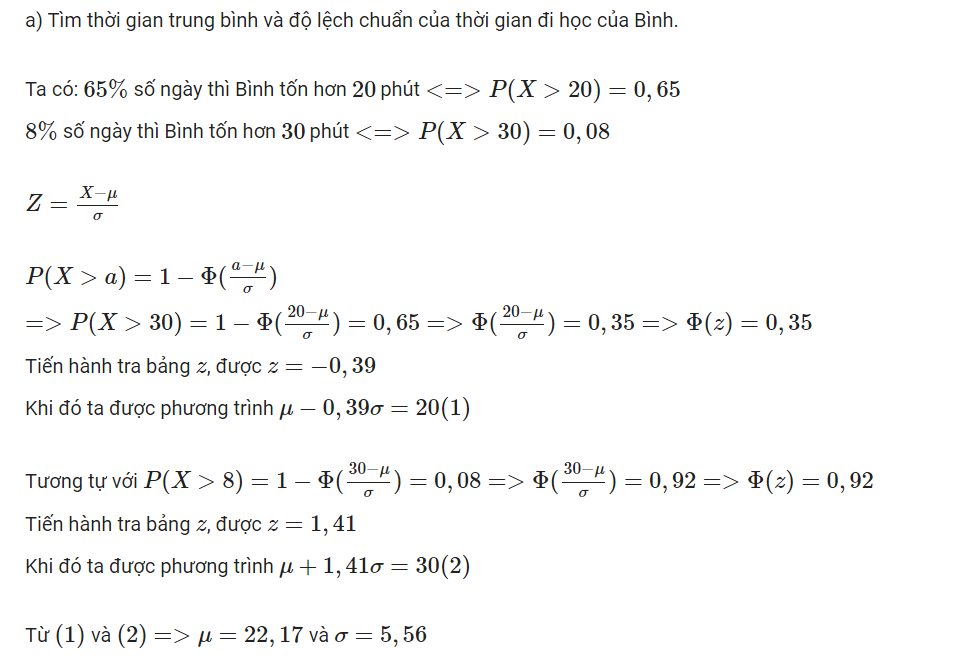

In [31]:
from scipy import linalg
A = np.array([[1,-0.39],[1,1.41]])
B = np.array([20,30])
linalg.solve(A,B)

array([22.16666667,  5.55555556])

In [38]:
muy=22.17
sigma = 5.56

*b) Nếu Bình xuất phát từ nhà vào $6h15$ sáng thì xác suất Bình trễ tiết $1$ của IUH là bao nhiêu? <br>*

Tiết 1 của trường IUH bắt đầu vào lúc $6h30$ mà Bình xuất phát từ $6h15$ vậy nên nếu muốn trễ học thì Bình phải mất hơn 15p để đi đến trường<br>
$P(X>15)$<br>
Gọi X là phân phối chuẩn vs $Mean = 22,17 , Std = 5,56$

In [39]:
X = st.norm(loc = muy ,scale = sigma)
print('Xác suất để Bình đi trễ tiết 1 khi xuất phát từ 6h15 là',X.sf(15).round(4))

Xác suất để Bình đi trễ tiết 1 khi xuất phát từ 6h15 là 0.9014


*c) Bình cần xuất phát vào lúc nào để xác suất kịp học tiết $10$ của IUH là $0.98$? <br>*
Tiết 10 của trương IUH bắt đầu vào lúc $15h10$ <br>
$P(X > a) = 0.98$

In [41]:
X.isf(0.98).round(4)

10.7512

Với xác suất = $0.98$ thì Bình đi trễ hơn tiết 10, là 10.75 $\approx $ 11 phút vậy để đi kịp tiết 10 thì Bình phải đi sớm hơn $15h10$  $11 p$ là phải xuất phát từ $14h59$

## 2. LUẬT SỐ LỚN VÀ ĐỊNH LÝ GIỚI HẠN TRUNG TÂM

Ta có định lý sau đây (*giới hạn trung tâm*): Nếu đại lượng ngẫu nhiên $X$ là tổng của một số rất lớn các đại lượng ngẫu nhiên độc lập và sự đóng góp, ảnh hưởng của mỗi đại lượng là không đáng kể thì $X$ sẽ có phân bố chuẩn hoặc xấp xỉ một phân bố chuẩn. Điều này cho ta quy các bài toán phức tạp, khó tính toán được bằng cách thông thường, về phân phối chuẩn và giải quyết nó dễ dàng. <br>
Bên cạnh đó còn có quy tắc sau (*luật số lớn*): Giả sử $X_1, X_2, ..., X_n$ là dãy các đại lượng ngẫu nhiên độc lập có cùng phân bố và có kỳ vọng là $\mu$, phương sai là $\sigma^2$ thì trung bình cộng $X = \frac{X_1+X_2+...+X_n}{n}$ sẽ hội tụ tới $\mu.$ <br>
<br>
Bên dưới, ta sẽ nghiên cứu một số xấp xỉ của các phân bố quen thuộc dựa theo định lý và quy luật ở trên: <br>

1. Cho dãy $(X_n)$ là dãy các đại lượng ngẫu nhiên tuân theo phân bố nhị thức, trong đó với mỗi $n$ thì $X_n$ là phân bố nhị thức với tham số $(n,p_n).$ Giả sử rằng tồn tại giới hạn $\lim n \cdot p_n = \lambda.$ Khi đó $X_n$ tuân theo phân bố Poisson với tham số $\lambda.$ <br>
Như vậy, với $n$ khá lớn và $p_n$ bé thì xấp xỉ là tốt, thông thường thì $n>50$. <br>
2. Cho dãy $(X_n)$ là dãy các đại lượng ngẫu nhiên độc lập nhau có cùng một phân bố với kỳ vọng $EX = \mu$ và phương sai $DX = \sigma^2$. Đặt $$S_n = \frac{X_1+X_2+...+X_n - n \mu}{\sqrt{n \sigma^2}}$$ thì ta có $P(S_n < x) = P(Z < x)$ với $Z$ là phân bố chuẩn tắc. Chú ý thêm rằng với số nguyên x, ta có thể điều chỉnh $P(X > x) \to P(X > x+0.5)$ hoặc $P(X < x) \to P(X < x - 0.5)$ để xác suất xấp xỉ chuẩn hơn.

**Yêu cầu:** (thực hiện trong 1.5 tiết) <br>
*Từ các nội dung trên, hãy thực hiện các yêu cầu sau:* <br>
1. Một xưởng in sách thấy rằng trung bình một quyển sách $500$ trang thì có chứa $300$ lỗi. Tìm xác suất để trong một trang sách có đúng $2$ lỗi, có ít nhất $2$ lỗi? Hãy giải thích tại sao không làm trực tiếp mà phải dùng xấp xỉ, và lý do tại sao việc xấp xỉ ở đây là hợp lệ. <br>
2. Xác suất làm một chiếc đinh ốc không đúng quy cách là $0.015$ và người ta xếp đinh ốc vào từng hộp, mỗi hộp có $100$ cái. Tính xác suất để hộp chứa toàn đinh ốc đúng quy cách. Tìm $n$ sao cho xác suất để lấy được $100$ đinh ốc đúng quy cách trong $n$ cái là không nhỏ hơn $0.8$. <br>
3. Gieo một con xúc sắc đối xứng tổng cộng $30$ lần. Tính xác suất để tổng số nút thu được là không vượt quá $100$, là lớn hơn $120.$ <br>
4. Trong khu phố có: $180$ hộ dân có $2$ người có lượng nước sinh hoạt sử dụng là đại lượng ngẫu nhiên có giá trị trung bình $0.6m^3$, độ lệch chuẩn $0.04m^3$ và $50$ hộ có hơn $2$ người có lượng nước sinh hoạt sử dụng là đại lượng ngẫu nhiên có giá trị trung bình $1.9m^3$, độ lệch chuẩn $0.14m^3$. Tính xác suất để trong một ngày, khu phố đó dùng hơn $205m^3$ nước.

**Bài 1**

Ta có 500 trang có 300 lỗi $\rightarrow$ 1 trang có $\frac{3}{5}$ lỗi <br>
$\rightarrow \lambda = \frac{300}{500} =\frac{3}{5}$<br>
Gọi X là phân phối poisson với $\lambda = \frac{3}{5}$

In [19]:
X = st.poisson(3/5)
print('Xác suất để 1 trang có đúng 2 lỗi là:',X.pmf(2).round(4))
print('Xác suất để có ít nhất 2 lỗi là:',X.sf(1).round(4))

Xác suất để 1 trang có đúng 2 lỗi là: 0.0988
Xác suất để có ít nhất 2 lỗi là: 0.1219


**Bài 2**

Ta có $\lambda = n\cdot p =0.015 \cdot 100$

In [20]:
Lambda = 0.985*100

Gọi Y là phân phối poisson với $\lambda = 1.5$

In [21]:
Y = st.poisson(Lambda)
print('Xác suất để hộp chứa toàn đinh ốc đúng quy cách là',Y.pmf(100))

Xác suất để hộp chứa toàn đinh ốc đúng quy cách là 0.03941058918453794


In [22]:
C = st.binom(100,0.985)
C.pmf(100)

0.22060891046938727

**Bài 3**

Xét 1 con xúc sắc có 6 mặt, xác suất của mỗi mặt là 1/6 nên kỳ vọng = (1+2+...+6)/6 = 3.5;
phương sai = (1^2+2^2+...+6^2)/6 - (3.5)^2

In [23]:
a=np.array([1,2,3,4,5,6])
print('E(X)=',a.mean())
print('Var(X)=',a.var())


E(X)= 3.5
Var(X)= 2.9166666666666665


Khi gieo xúc sắc 30 lần, ta sẽ được 30 phân bố xác suất độc lập, nên theo định lý giới hạn trung tâm, ta có tổng $X = (X_1 + X_2 + X_3 +...  +X_{30})$ Theo phân bố chuẩn ta có $E(X) = 3.5 \cdot 30 , Var(X)=2.9166 \cdot 30$

In [24]:
mean = 3.5*30
varX = a.var()*30
mean,varX

(105.0, 87.5)

Gọi Z là phân phối chuẩn với $\mu = 105, \sigma = \sqrt{87.5}$

In [25]:
Z = st.norm(loc = 105,scale = np.sqrt(87.5))
print('Xác suất để số nút thu được không quá 100 là:',Z.cdf(100).round(4))
print('Xác suất để số nút thu được lớn hơn 120 là:',Z.sf(120).round(4))

Xác suất để số nút thu được không quá 100 là: 0.2965
Xác suất để số nút thu được lớn hơn 120 là: 0.0544


**Bài 4**  Trong khu phố có: $180$ hộ dân có $2$ người có lượng nước sinh hoạt sử dụng là đại lượng ngẫu nhiên có giá trị trung bình $0.6m^3$, độ lệch chuẩn $0.04m^3$ và $50$ hộ có hơn $2$ người có lượng nước sinh hoạt sử dụng là đại lượng ngẫu nhiên có giá trị trung bình $1.9m^3$, độ lệch chuẩn $0.14m^3$. Tính xác suất để trong một ngày, khu phố đó dùng hơn $205m^3$ nước.

Gọi khu phố có 180 hộ là khu 1, Khu phố 50 hộ là khu 2, khi đó :<br>
$E_1 = 0.6\cdot 180 = 108$ <br>
$E_2 = 1.9\cdot 50 = 95$ <br>
Và $E$ của khu phố sẽ bằng $E_1 + E_2 = 203$
Tương tự với phương sai:
$Var = Var_1 + Var_2 = 180\cdot (0.04)^2 + 50\cdot (0.14)^2 = 1.268$<br>
$\Rightarrow  Std = \sqrt{Var} = \sqrt{1.268}$

In [26]:
mean = 0.6*180+1.9*50
Var = 180*(0.04)**2 + 50*(0.14)**2
std = np.sqrt(Var)
std

1.1260550608207398

Gọi X là phân phối chuẩn với $Mean = 203, Std = \sqrt{1.268}$

In [27]:
X = st.norm(loc = 203, scale = std)

In [28]:
print('Xác suất để trong một ngày, khu phố đó dùng hơn 205 khối nước là:',X.sf(205).round(4))

Xác suất để trong một ngày, khu phố đó dùng hơn 205 khối nước là: 0.0379


**BT bổ sung**
* Bài 1. Xí nghiệp sản xuất máy tính có xác suất làm ra phế phẩm là 0,02. Chọn ngẫu nhiên 250 máy tính để kiểm tra. Tính xác suất để:
- a) Có đúng 2 máy phế phẩm.
- b) Có không quá 3 máy phế phẩm.
* Bài 2. Xác suất để hạt giống không nảy mầm là 0,03. Gieo 150 hạt, tính xác suất có ít nhất 6 hạt không nảy mầm.
* Bài 3. Khu nhà có 160 hộ gia đình. Xác suất để mỗi hộ có sự cố về điện vào mỗi buổi tối là 0,02. Tính xác sất để trong một buổi tối:
- a) Có đúng 4 gia đình gặp sự cố về điện.
- b) Số gia đình gặp sự cố về điện là 2 tới 5.

In [29]:
st.norm.pdf(0.35)

0.3752403469169379